# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [53]:
# Import your libraries:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Your observations here
#1) FRESH: annual spending (m.u.) on fresh products (Continuous);
#2) MILK: annual spending (m.u.) on milk products (Continuous);
#3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
#4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
#5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
#6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
#7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
#8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
#Descriptive Statistics:


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
#no hay categoricos ni datos faltantes

In [5]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:ylabel='Channel'>

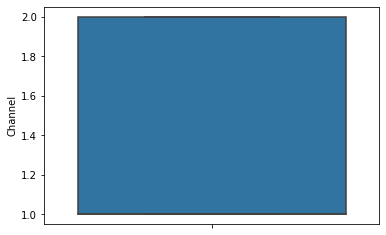

In [11]:
sns.boxplot(y=customers['Channel'])

<AxesSubplot:ylabel='Region'>

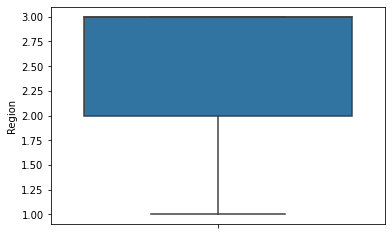

In [12]:
sns.boxplot(y=customers['Region'])

<AxesSubplot:ylabel='Milk'>

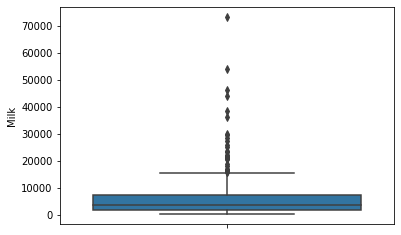

In [14]:
sns.boxplot(y=customers['Milk'])


<AxesSubplot:ylabel='Fresh'>

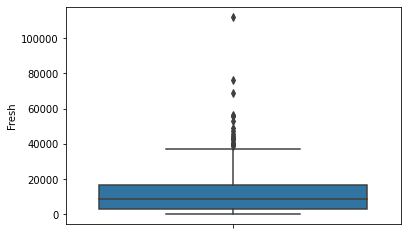

In [15]:
sns.boxplot(y=customers['Fresh'])

<AxesSubplot:ylabel='Grocery'>

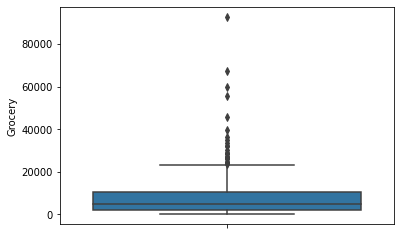

In [16]:
sns.boxplot(y=customers['Grocery'])

<AxesSubplot:ylabel='Detergents_Paper'>

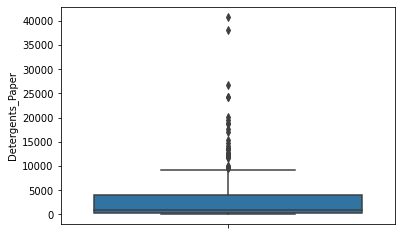

In [17]:
sns.boxplot(y=customers['Detergents_Paper'])


<AxesSubplot:ylabel='Delicassen'>

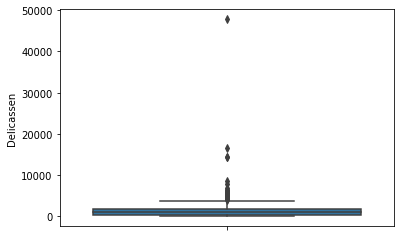

In [18]:
sns.boxplot(y=customers['Delicassen'])


In [ ]:
#hay muchos outliers

(array([298.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 142.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

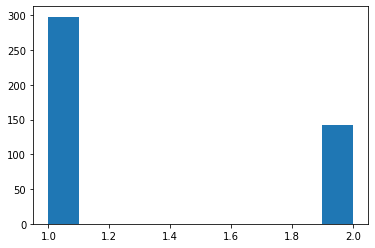

In [19]:
plt.hist(customers.Channel)

(array([267., 109.,  38.,  16.,   4.,   3.,   2.,   0.,   0.,   1.]),
 array([3.000000e+00, 1.121780e+04, 2.243260e+04, 3.364740e+04,
        4.486220e+04, 5.607700e+04, 6.729180e+04, 7.850660e+04,
        8.972140e+04, 1.009362e+05, 1.121510e+05]),
 <BarContainer object of 10 artists>)

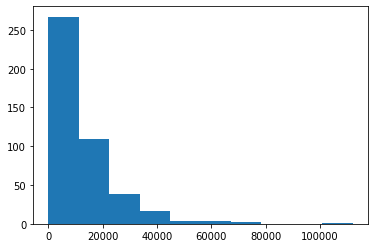

In [21]:
plt.hist(customers.Fresh)

(array([335.,  74.,  17.,   6.,   3.,   2.,   1.,   1.,   0.,   1.]),
 array([5.50000e+01, 7.39930e+03, 1.47436e+04, 2.20879e+04, 2.94322e+04,
        3.67765e+04, 4.41208e+04, 5.14651e+04, 5.88094e+04, 6.61537e+04,
        7.34980e+04]),
 <BarContainer object of 10 artists>)

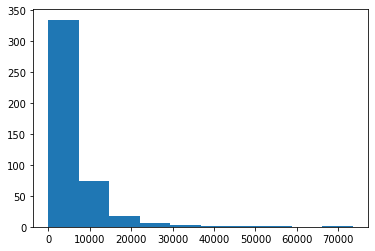

In [23]:
plt.hist(customers.Milk)

(array([ 77.,   0.,   0.,   0.,   0.,  47.,   0.,   0.,   0., 316.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

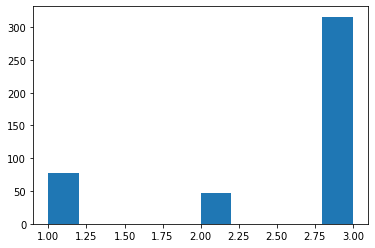

In [24]:
plt.hist(customers.Region)

(array([311.,  82.,  32.,   9.,   2.,   1.,   1.,   1.,   0.,   1.]),
 array([3.00000e+00, 9.28070e+03, 1.85584e+04, 2.78361e+04, 3.71138e+04,
        4.63915e+04, 5.56692e+04, 6.49469e+04, 7.42246e+04, 8.35023e+04,
        9.27800e+04]),
 <BarContainer object of 10 artists>)

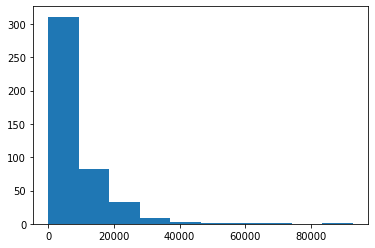

In [25]:
plt.hist(customers.Grocery)

(array([335.,  68.,  16.,  10.,   6.,   2.,   1.,   0.,   0.,   2.]),
 array([3.00000e+00, 4.08540e+03, 8.16780e+03, 1.22502e+04, 1.63326e+04,
        2.04150e+04, 2.44974e+04, 2.85798e+04, 3.26622e+04, 3.67446e+04,
        4.08270e+04]),
 <BarContainer object of 10 artists>)

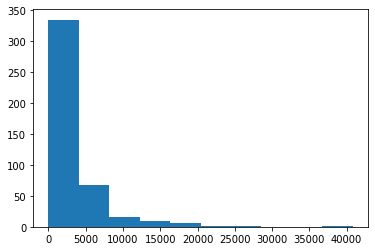

In [27]:
plt.hist(customers.Detergents_Paper)

(array([379.,  45.,  12.,   1.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([2.50000e+01, 6.10940e+03, 1.21938e+04, 1.82782e+04, 2.43626e+04,
        3.04470e+04, 3.65314e+04, 4.26158e+04, 4.87002e+04, 5.47846e+04,
        6.08690e+04]),
 <BarContainer object of 10 artists>)

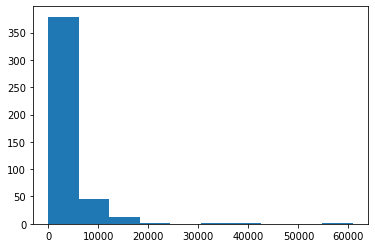

In [28]:
plt.hist(customers.Frozen)

(array([419.,  17.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.0000e+00, 4.7970e+03, 9.5910e+03, 1.4385e+04, 1.9179e+04,
        2.3973e+04, 2.8767e+04, 3.3561e+04, 3.8355e+04, 4.3149e+04,
        4.7943e+04]),
 <BarContainer object of 10 artists>)

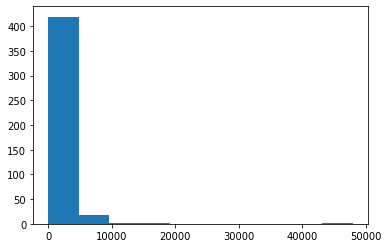

In [29]:
plt.hist(customers.Delicassen)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [32]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
rb.fit(customers.iloc[:, 2:])
customers_rb = rb.transform(customers.iloc[:, 2:])

#tenemos muchos outliers

In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [37]:
# Your import here:

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
# Your code here:
customers_scale=customers[customers.columns[:2]]
for i in customers.columns[2:]:
    customers_scale[i] = scale.fit_transform(customers[i].values.reshape(-1,1))

C:\Users\sofia\AppData\Local\Temp/ipykernel_24932/2814249883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_scale[i] = scale.fit_transform(customers[i].values.reshape(-1,1))
C:\Users\sofia\AppData\Local\Temp/ipykernel_24932/2814249883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_scale[i] = scale.fit_transform(customers[i].values.reshape(-1,1))
C:\Users\sofia\AppData\Local\Temp/ipykernel_24932/2814249883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [38]:
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,1,3,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,3,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,2,3,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,3,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [39]:
# Your code here:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters=2, random_state=42)
customers_clusters=kmeans.fit(customers_scale)

In [41]:
customers['labels']=customers_clusters.labels_

Count the values in `labels`.

In [44]:
# Your code here:
customers['labels'].value_counts()

0    385
1     55
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with AgglomerativeClustering

Now let's cluster the data using AgglomerativeClustering. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_AC']`. Now your original data have two labels, one from K-Means and the other from AgglomerativeClustering.

In [47]:
# Your code here
from sklearn.cluster import AgglomerativeClustering
agg_clust = AgglomerativeClustering()


In [48]:
customers_agg_clusters = agg_clust.fit(customers_scale)
customers['labels_AC']=customers_agg_clusters.labels_

Count the values in `labels_AC`.

In [50]:
# Your code here
customers['labels_AC'].value_counts()

1    287
0    153
Name: labels_AC, dtype: int64

# Challenge 5 - Compare K-Means with AgglomerativeClustering

Now we want to visually compare how K-Means and AgglomerativeClustering have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_AC`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_AC` respectively

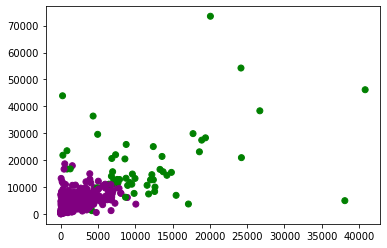

In [67]:
# Your code here:
labels=customers['labels']
colors = ["purple","green"]

asignar=[]
for row in labels:
    asignar.append(colors[row])

plt.scatter(customers['Detergents_Paper'], customers['Milk'], color=asignar)

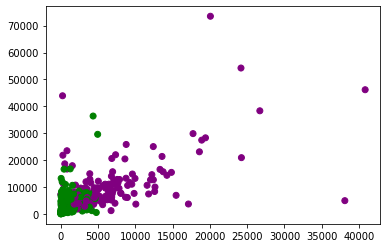

In [75]:
labels_AC=customers['labels_AC']

colors_ac = ["purple","green"]
asignar_AC=[]
for row in labels_AC:
    asignar_AC.append(colors_ac[row])
    
plt.scatter(customers['Detergents_Paper'], customers['Milk'], color=asignar_AC)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_AC` respectively

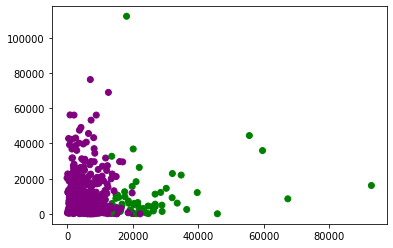

In [73]:
# Your code here:
labels=customers['labels']
colors = ["purple","green"]

asignar=[]
for row in labels:
    asignar.append(colors[row])

plt.scatter(customers['Grocery'], customers['Fresh'], color=asignar)

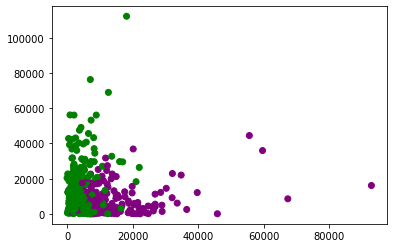

In [76]:
labels_AC=customers['labels_AC']

colors_ac = ["purple","green"]
asignar_AC=[]
for row in labels_AC:
    asignar_AC.append(colors_ac[row])
    
plt.scatter(customers['Grocery'], customers['Fresh'], color=asignar_AC)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_AC` respectively

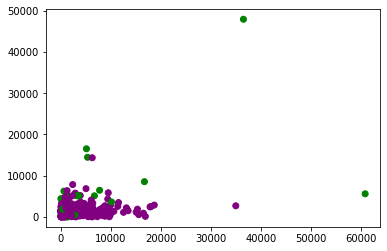

In [77]:
# Your code here:
labels=customers['labels']
colors = ["purple","green"]

asignar=[]
for row in labels:
    asignar.append(colors[row])

plt.scatter(customers['Frozen'], customers['Delicassen'], color=asignar)

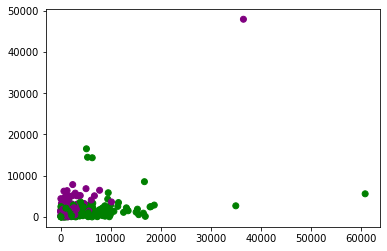

In [78]:
# Your code here:
labels_AC=customers['labels_AC']

colors_ac = ["purple","green"]
asignar_AC=[]
for row in labels_AC:
    asignar_AC.append(colors_ac[row])
    
plt.scatter(customers['Frozen'], customers['Delicassen'], color=asignar_AC)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_AC` respectively and compute the means for all columns.

In [ ]:
# Your code here:
customers.groupby['labels_AC']

In [79]:
customers.groupby(['labels_AC']).mean()[customers.columns[2:-2]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_AC,,,,,,
0,8400.039216,10878.777778,15815.908497,1799.196078,6887.640523,2150.960784
1,13919.599303,3086.773519,3758.634146,3750.428571,745.811847,1191.101045


In [80]:
customers.groupby(['labels']).mean()[customers.columns[2:-2]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,12137.864935,3939.348052,5294.602597,2926.070130,1627.425974,1243.301299
1,11037.327273,18794.690909,26548.000000,4092.963636,11659.963636,3495.854545


Which algorithm appears to perform better?

In [ ]:
# Your observations here

#tienen comportamientos similares, sin embargo hay unas pequenas diferencias en las medias de los clusters 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with AgglomerativeClustering because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing AgglomerativeClustering linkage criteria

Experiment changing the linkage param in AgglomerativeClustering.

In [ ]:
# Your code here

In [ ]:
# Your comment here